In [1]:
%pylab inline
from scipy.linalg import svd
from numpy.linalg import norm
from scipy.sparse.linalg import svds, eigs
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import time
from collections import defaultdict
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')

             

def Ur_hat(B, c, r):
    M = []
    col_prob = norm(B, 2, 0)**2/norm(B, 'fro')**2
    col_range = range(0, B.shape[1])                
    cols_sample = np.random.choice(col_range, c, p=col_prob)
    M = B[:, cols_sample]
    Ur_h_complete, U_1values_h, UVT_h_complete = randomized_svd(M, n_components=r,n_iter=5,random_state=None)
    Ur_h = Ur_h_complete
    return Ur_h

def Vr_hat(B, c, r):
    M = []
    row_prob = norm(B, 2, 1)**2/norm(B, 'fro')**2
    row_range=range(0, B.shape[0])                
    rows_sample = np.random.choice(row_range, c, p=row_prob)
    M = B[rows_sample, :]
    Vr_h_complete, Vr_1values_h, V_VT_h_complete = randomized_svd(M, n_components=r,n_iter=5,random_state=None)
    Vr_h = V_V_h_complete
    return Vr_h
   
def power_method(A , eps=1e-6, steps=1000):
    mn = np.random.rand(A.T.shape[1])
    mn = mn[:, np.newaxis]
    for _ in range(steps):
        A_T_mn1 = np.dot(A.T, mn)
        AA_T_mn1 = np.dot(A, A_T_mn1)
        AA_T_mn1_norm = np.linalg.norm(AA_T_mn1)
        mn = A_A_T_zk1 / AA_T_zk1_norm
        m_diff = np.linalg.norm(z_k - AA_T_mn1)
    return np.abs(np.dot(mn.T, np.dot(A, np.dot(A.T, mn)))[0][0]), mn

def power_method_ur(A_h, A , eps=1e-6, steps=1000):
    mn = np.random.rand(A.T.shape[1])
    mn = zk[:, np.newaxis]
    for _ in range(steps):
        mn1 = np.dot(A.T, mn)
        mn1 = np.dot(A, mn1)
        mn1_h = np.dot(A_h.T, mn)
        mn1_h = np.dot(A_h, mn1_h)
        mn1_diff = z_k1_h - mn1
        mn1_norm = np.linalg.norm(mn1_diff)
        mn = mn1_diff / mn1_norm
        m_succ_diff = np.linalg.norm(z_k - mn1_diff)
    AATz = np.dot(A, np.dot(A.T, mn))
    AA Tz_h = np.dot(A_h, np.dot(A_h.T, mn))
    return np.abs(np.dot(mn.T, AATz_h-AATz)[0][0]), mn

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
m = 1000
n = 100000
epsilon = [0.01, 0.05, 0.1]
np.random.seed(42)

def create_A(m, n, r):
    X_f = np.random.random(size=(m, m))
    X, _ = np.linalg.qr(X_f)
    Y_f = np.random.random(size=(n, m))
    Y, _ = np.linalg.qr(Y_f)
    x = [r-i+1 for i in range(0, r)] + [4*0.001 for i in range(r, m)]
    x = np.array(x)
    D = np.diag(x)
    A = np.matmul(np.matmul(X,D), Y.T)
    return A

In [3]:
optimized_values = defaultdict(dict)
r_v_T = {}
r_v_T = defaultdict(dict)
m = 1000
n = 100000
np.random.seed(42)

for r in [2, 5, 15, 20]:
    start = time.time()
    A = create_A(m, n, r)
    Ur, Sr, VrT = svds(A, k=r)
    end = time.time()
    svds_T = end - start
    r_v_T[r]['svd'] = svds_T
    
    for eps in [0.01, 0.05, 0.1]:
        for c in range(r, 50):
            E_u = 0
            E_v = 0
            start_T = time.time()
            for i in range(0, 10):
                Ur_h = Ur_h(A, c, r)
                Vr_h = Vr_h(A, c, r)

                U_E = power_method_ur(Ur_h, Ur)[0]
                U_E = U_E/power_method(Ur)[0]

                V_E = power_method_ur(Vr_h, VrT)[0]
                V_E = V_E/power_method(VrT)[0]
                E_u += U_E
                E_v += V_E
            end_T = time.time()
            total_time = end_T - start_T
            if (E_u/10 <= eps) and (E_v/10 <= eps):
                r_v_T[r][eps] = total_time
                print('r={} | eps = {} | c = {} | error_U = {} | error_V = {}'.format(r, eps, c, E_u/10, E_v/10))
                optimized_values[r][eps] = c
                break
        
        

r=2 | eps = 0.01 | c = 3 | error_U = 0.0028675298102112884 | error_V = 1.02917880288183e-15
r=2 | eps = 0.05 | c = 2 | error_U = 0.02159145304124639 | error_V = 7.778033977992975e-16
r=2 | eps = 0.1 | c = 3 | error_U = 0.030602571947065265 | error_V = 9.591064777746066e-16
r=5 | eps = 0.01 | c = 8 | error_U = 0.006132564874139587 | error_V = 1.2030330289841895e-15
r=5 | eps = 0.05 | c = 6 | error_U = 0.02208112422624251 | error_V = 1.249601385272565e-15
r=5 | eps = 0.1 | c = 6 | error_U = 0.013678567118928587 | error_V = 1.1978922603129753e-15
r=15 | eps = 0.01 | c = 28 | error_U = 0.007414001145406697 | error_V = 6.1451666363353556e-15
r=15 | eps = 0.05 | c = 17 | error_U = 0.02401404163046956 | error_V = 5.9118842243569965e-15
r=15 | eps = 0.1 | c = 16 | error_U = 0.05931858663928271 | error_V = 6.349574013380783e-15
r=20 | eps = 0.01 | c = 32 | error_U = 0.00862959153642082 | error_V = 5.96270877796248e-15
r=20 | eps = 0.05 | c = 21 | error_U = 0.037359577593668425 | error_V = 6.495

In [4]:
df = pd.DataFrame(r_vs_time)
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &         2  &         5  &          15 &          20 \\
\midrule
svd  &   8.253330 &   8.065989 &    8.959902 &   10.290088 \\
0.01 &  20.176221 &  35.248929 &  133.875731 &  177.902626 \\
0.05 &   9.452681 &  33.465645 &  113.657380 &  163.645449 \\
0.1  &  20.610069 &  33.739973 &  117.326629 &  163.014011 \\
\bottomrule
\end{tabular}



In [ ]:
def setup_axis(Axis):
    Axis.set_xlabel('')
    Axis.yaxis.set_major_formatter(ScalarFormatter())
    Axis.yaxis.major.formatter._useMathText = True
    Axis.yaxis.set_minor_locator(  AutoMinorLocator(5))
    Axis.xaxis.set_minor_locator(  AutoMinorLocator(5))
    Axis.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.6)
    Axis.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.7)
    Axis.grid(True)

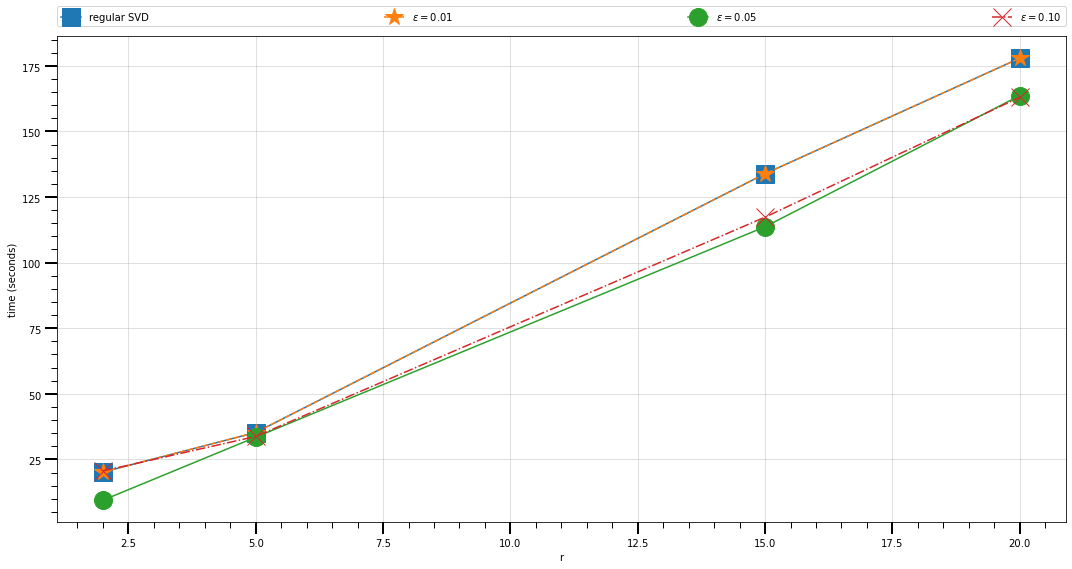

In [5]:
def setup_axis(Axis):
    Axis.set_xlabel('')
    Axis.yaxis.set_major_formatter(ScalarFormatter())
    Axis.yaxis.major.formatter._useMathText = True
    Axis.yaxis.set_minor_locator(  AutoMinorLocator(5))
    Axis.xaxis.set_minor_locator(  AutoMinorLocator(5))
    Axis.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.6)
    Axis.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.7)
    Axis.grid(True)


fig, Axis = plt.subplots(figsize=(15,8))
col=df.loc[0.01, :]
Axis.plot(df.columns, col, marker='s', linestyle='-', markersize=18, label='regular SVD')
Axis.plot(df.columns, col, marker='*', linestyle='--', markersize=18, label='$\epsilon=0.01$')
col=df.loc[0.05, :]
Axis.plot(df.columns, col, marker='o', linestyle='-', markersize=18, label='$\epsilon=0.05$')
col=df.loc[0.10, :]
Axis.plot(df.columns, col, marker='x', linestyle='-.', markersize=18, label='$\epsilon=0.10$')
setup_axis(Axis)
Axis.set_xlabel('r')
Axis.set_ylabel('time (seconds)')
Axis.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=4, mode="expand", borderaxespad=0.)
fig.tight_layout()

In [6]:
df = pd.DataFrame(optimized_values)
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  2  &  5  &  15 &  20 \\
\midrule
0.01 &   3 &   8 &  28 &  32 \\
0.05 &   2 &   6 &  17 &  21 \\
0.10 &   3 &   6 &  16 &  21 \\
\bottomrule
\end{tabular}



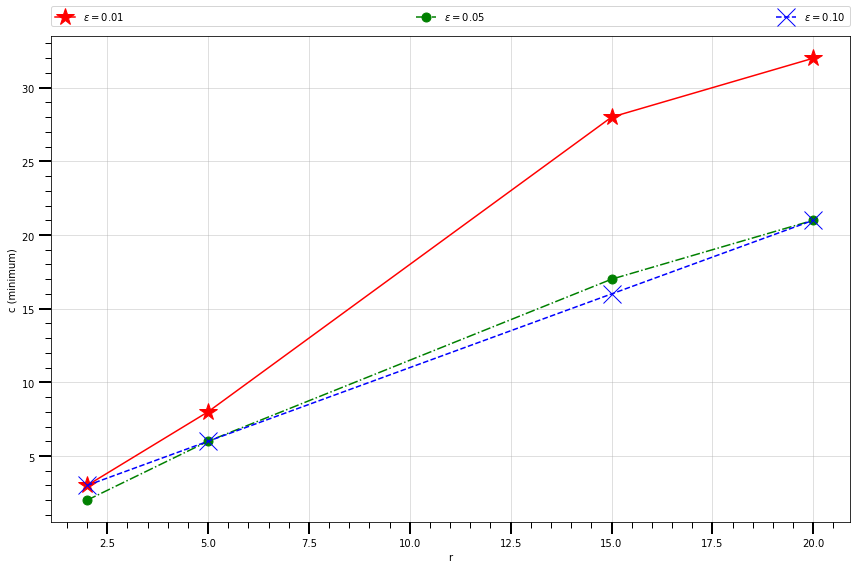

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.columns, df.loc[0.01, :], marker='*', color='r',linestyle='-', markersize=18, label='$\epsilon=0.01$')
ax.plot(df.columns, df.loc[0.05, :], marker='.', color='g',linestyle='-.', markersize=18, label='$\epsilon=0.05$')
ax.plot(df.columns, df.loc[0.10, :], marker='x', color='b',linestyle='--', markersize=18, label='$\epsilon=0.10$')
setup_axis(ax)
ax.set_xlabel('r')
ax.set_ylabel('c (minimum)')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=3, mode="expand", borderaxespad=0.)
fig.tight_layout()